# Data Preprocessing

Consider data X of dimension  (N X D) where N is the number of data , D is the dimensions(features)

There are three forms of data preprocessing.
- **Mean subtraction**: Most common form of preprocessing. It involves subtracting the mean across every individual feature in the data. Geometric interpretation of centering the cloud of data around the origin along every dimension. Python command: X-=np.mean(X,axis=0) (vectorized)
- **Normalization**: Normalizing the data dimension so that they are of approximately the same scale.Tow common types of normalization.
      - divide each dimension by its standard deviation. X/=np.std(X,axis=0)
      - normalize each dimension so that the range of every dimesion lies [-1,1]
          - we will perform this if data contains features varying in their values by large amounts or have different units.e.g. 1000 kg, 400 gm e.t.c.
PCA whitening: Discussed below.

We will apply these procedures in CIFAR-10 dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:

def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [ ]:
def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


In [5]:
cifar_10_dir = 'Dataset\cifar10'
train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = load_cifar_10_data(cifar_10_dir)
print("Train data: ", train_data.shape)
print("Train filenames: ", train_filenames.shape)
print("Train labels: ", train_labels.shape)
print("Test data: ", test_data.shape)
print("Test filenames: ", test_filenames.shape)
print("Test labels: ", test_labels.shape)
print("Label names: ", label_names.shape)

Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


In [6]:
# Flatten out the data
Xt=train_data.reshape(train_data.shape[0],32*32*3)
Xte=test_data.reshape(test_data.shape[0],32*32*3)

In [7]:
print(Xt.shape)

(50000, 3072)


visualising first 25 images

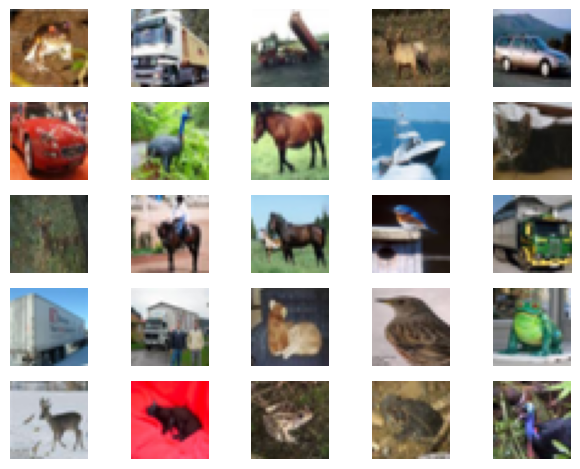

In [8]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=Xt[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

### Applying different preprocessing described earlier


In [9]:
# mean normalization
Xt=Xt.astype(np.float64)
Xt-=np.mean(Xt,axis=0)

In [10]:
Xt_cov=Xt  # we will use it later to determine covariance matrix

After applying mean normalization let's see the image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

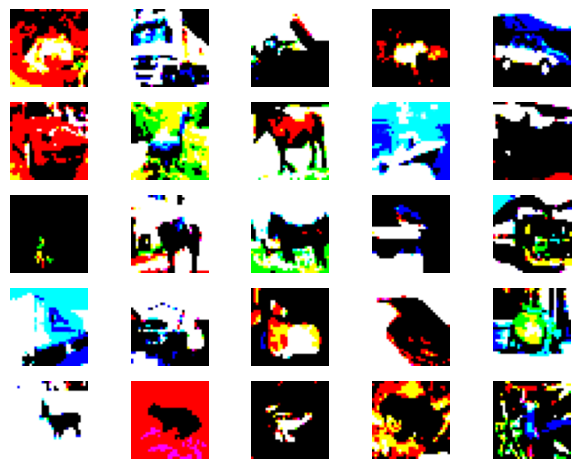

In [11]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=Xt[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

In [12]:
# Xt/=np.std(Xt,axis=0)

In [13]:
# # display some random training images in a 25x25 grid
# for m in range(5*5):
#           img=Xt[m].reshape(32,32,3)
#           plt.subplot(5,5,m+1)
#           plt.imshow(img)
#           plt.axis('off')
# plt.tight_layout() #Adjust subplot spacing for a cleaner layout
# plt.show()
   

**NOTE**
When training on natural images, it makes little sense to estimate a separate mean and variance for each pixel, because the statistics in one part of the image should (theoretically) be the same as any other.
This property of images is called ”‘stationarity.”’

In detail, in order for PCA to work well, informally we require that (i) The features have approximately zero mean, and (ii) The different features have similar variances to each other. With natural images, (ii) is already satisfied even without variance normalization, and so we won’t perform any variance normalization.

we don't need to apply normalization to make the range [-1,1] because the image pixel values lies between 0-255 which is already scaled in a particular range.

### PCA and Whitening
[PCA fundamentals]{https://github.com/khalequzzamanlikhon/DeepLearning-ComputerVision/blob/master/00-Prerequisite/principal%20component%20analysis(PCA).ipynb}

In [14]:
cov=np.dot(Xt_cov.T,Xt_cov)/Xt_cov.shape[0]

In [15]:
cov.shape

(3072, 3072)

In [16]:
U,S,V=np.linalg.svd(cov)
print(U)

[[-0.02634975 -0.01584631 -0.02171791 ...  0.00449071  0.00433166
   0.00574275]
 [-0.02778743 -0.01756834 -0.01858465 ... -0.00769445 -0.00629112
  -0.00783228]
 [-0.03111119 -0.02031506 -0.01290838 ...  0.00281496  0.00181874
   0.0018612 ]
 ...
 [-0.01573704  0.02254787 -0.02581563 ...  0.00012297 -0.0016892
  -0.00511573]
 [-0.01672143  0.02146667 -0.02255578 ...  0.00082148  0.00131545
   0.00677897]
 [-0.01920378  0.02053795 -0.01697871 ... -0.00071523  0.000526
  -0.00138491]]


In [17]:
U.shape

(3072, 3072)

U contains eigen vectors as columns corresponding to the eigen values. Moreover, vectors are organized in descending order based on $\lambda$ values. These vectors are new basis in which we can represent our data. $u_1^T x^i$ is the length(magnitude) of the projection of data $x^i$(considering CIFAR-10, an image ) onto the vector u1.

### Rotating the data
we can represent data values in the (u1,u2,....,) basis by computing $U^Tx^i$ where i=1 to number of training examples.

In [18]:
Xt_cov.shape

(50000, 3072)

In [19]:
# Xrot=np.dot(Xt_cov,U)
Xrot=np.dot(Xt_cov,U)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

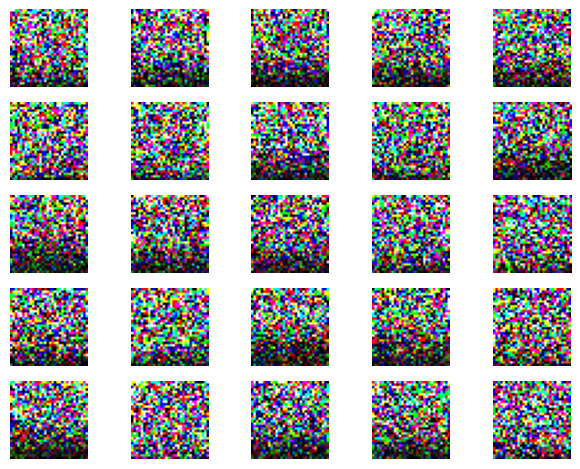

In [20]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=Xrot[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

This is the training set rotated into the basis of U vector. we can go back to the original image simply by multiplying the Xrot by U. Since $U^TU=I& and $UU^T=I&

In [21]:
Xrot.shape

(50000, 3072)

In [22]:
# unrotate
original_val=np.dot(Xrot,U.T)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

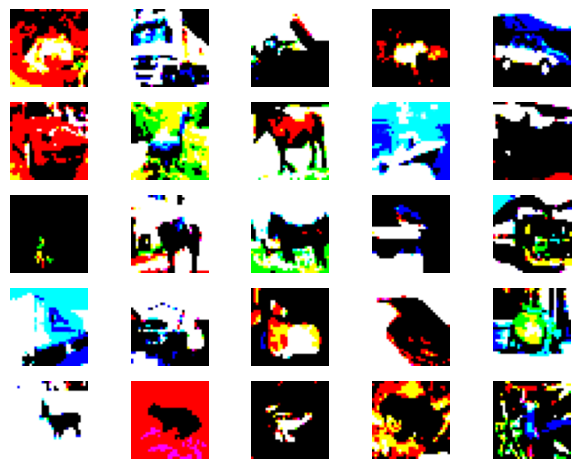

In [23]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=original_val[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

here by unrotating the original images.

### Reducing data dimension
**Function of PCA**: We know that U vector contains vectors corresponding to eigen values $\lambda$ in descending order. This turns out that the first vector represents the principal direction of variance of data. Then the second vector contains direction of variance less than first one and so on.
We can take top k components from Xrot considering the top k components hold the maximum variance. Thus to drop the n-k components from Xrot. 

#### Choosing value of k:
- If k is too large , we won't be compressing the data;in the limit k=n. we will use the data as it is but rotated into different basis.
- If k is too small we will incur more loss and a bad prediction
- To set value of k:
     -  After having the principal components, to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of eigenvalues.$\begin{align}
\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^n \lambda_j}.
\end{align}$
     - Say we want 95 % of the data. Then we can add upto the number of lamda to get this percentage.
     - In the case of images, one common heuristic is to choose k
 so as to retain 99% of the variance. In other words, we pick the smallest value of k that satisfies $\begin{align}
\frac{\sum_{j=1}^k \lambda_j}{\sum_{j=1}^n \lambda_j} \geq 0.99. 
\end{align}$
- we can take manually the number of k
     
     

The 'S' matrix contains singular values ($\sigma$) diagonally.we know $\sigma$= $\sqrt \lambda$. Therefore we need to square the value of S to get lambda.

In [25]:
lambdas=S**2
print(lambdas.shape)

(3072,)


In [26]:
#choosing k 
k=0
lambda_sum=0
while True:
    lambda_sum+=lambdas[k]
    if (lambda_sum/np.sum(lambdas))*100>=99.99:
        k+=1
        break
    k+=1
print(lambda_sum/np.sum(lambdas),k)


0.9999011381503323 158


here we can see that if we take only 158 components from Xrot, it will have almost 99.99 percent variance of the data. In this case data dimension is decreased to 158 instead of 3072.

In [27]:
Xrot_reduced=np.dot(Xt_cov,U[:,:158])

In [28]:
Xrot_reduced.shape

(50000, 158)

Let's have some look  of a single image from the main dataset and this dimension reduced data.

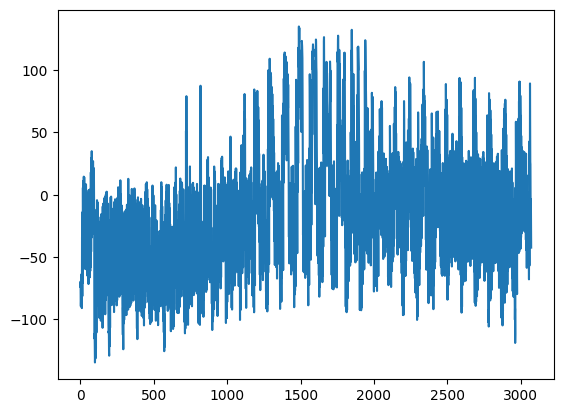

In [39]:
plt.plot(Xt[0])
plt.show()

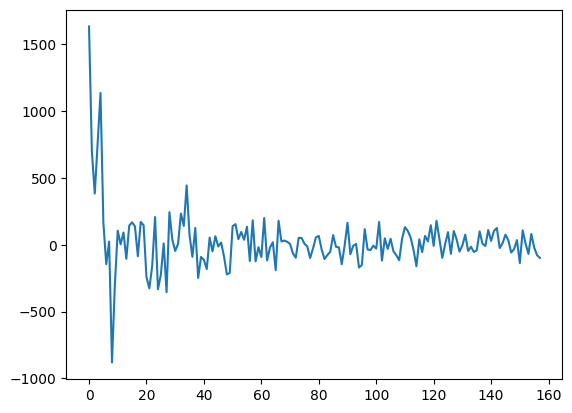

In [40]:
plt.plot(Xrot_reduced[0])
plt.show()

### Recovering an Approximation of the Data
The Xrot_reduced is the lower dimensional data. Now if we want to go back to the original data or to estimate it we should do as following,
- we took only selected higher components and truncated the other dimensions and assuming the lower values as zeros. So now we need to zero pad the Xrot_reduced data with n-k zeros. After that we need to multiply it with U.T (NB: U and U.T it varies depending the structure of the data.)

In [42]:
#create a matrix of zeros with desired shape
zero_padded_data=np.zeros((50000,3072))
#copying the reduced data to this zero padded data
zero_padded_data[:,:Xrot_reduced.shape[1]]=Xrot_reduced

In [43]:
zero_padded_data.shape

(50000, 3072)

padding with zero refers that the data is still reduced to 50000 X 158   because the other value is zero. so we can see the reudced images also.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

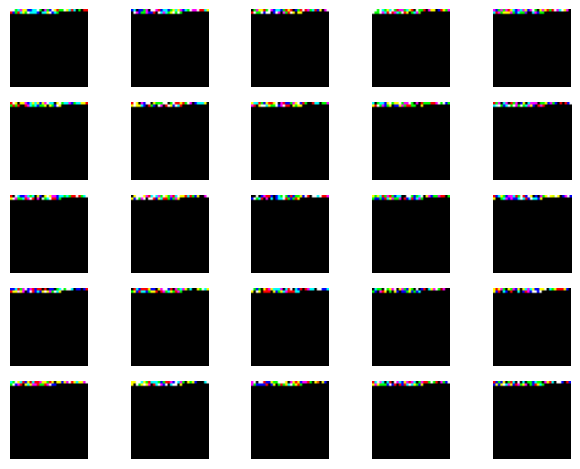

In [47]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=zero_padded_data[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

In [44]:
# multiply it with U.T
orig_approximation=np.dot(zero_padded_data,U.T)

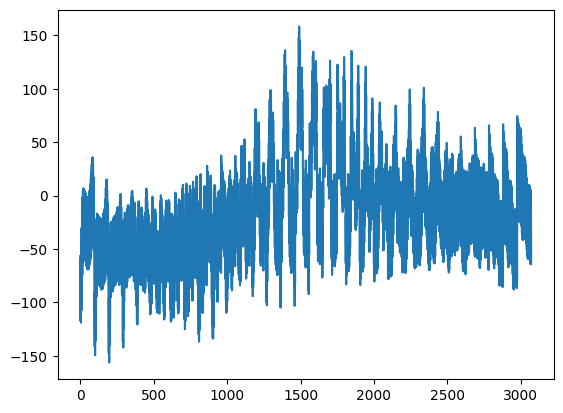

In [45]:
plt.plot(orig_approximation[0])
plt.show()

we can also show some images from this original approximation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

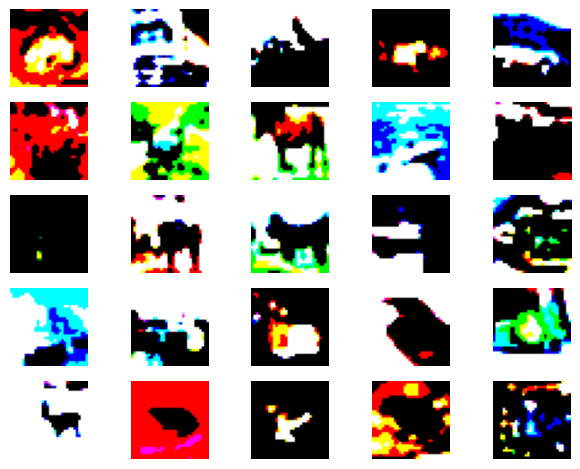

In [46]:
# display some random training images in a 25x25 grid
for m in range(5*5):
          img=orig_approximation[m].reshape(32,32,3)
          plt.subplot(5,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
   

### Whitening
Using PCA we have reduced the dimensions. There is another preprocessing step called **whitening**. Sometimes it is referred to  **shpherig**. In an image the adjacent pixel values are almost same which results to data redundancy. **goal** is (i) to make the data less correlated and (ii) features all have the same variance.

- step 1: Uncorrelate the data: which we have already done while data rotation $x_rot=U^TX$ we will see that diagonal value of the covariance matrix of Xrot are lambda values and the off diagonal values are zero or near zero which means that datas are uncorrelated.
- step 2: Finally to make each of input features have unit variance, we can simply rescale each feature Xrot_i by $1/\sqrt \lambda _i$. We describe whitened data as follows, $\begin{align}
x_{\rm PCAwhite,i} = \frac{x_{\rm rot,i} }{\sqrt{\lambda_i}}.   
\end{align}$

In [48]:
Xwhite=Xrot/np.sqrt(S+1e-5)

Note that we’re adding 1e-5 (or a small constant) to prevent division by zero. One weakness of this transformation is that it can greatly exaggerate the noise in the data, since it stretches all dimensions (including the irrelevant dimensions of tiny variance that are mostly noise) to be of equal size in the input. This can in practice be mitigated by stronger smoothing (i.e. increasing 1e-5 to be a larger number).

we can also apply PCA and whitening together. For this purpose we will select first k components from Xwhite

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


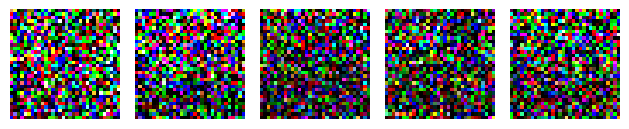

In [49]:
#lets see 5 images from Xwhite
for m in range(5):
          img=Xwhite[m].reshape(32,32,3)
          plt.subplot(1,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
    

### ZCA Whitening:
Say R, any orthogonal matrix. Therefore $R^TR$ is I. that means if we multiply Xpcawhite with any orthogonal matrix we will have still identity covariance. In ZCA whitening we will take R=U.\begin{align}
x_{\rm ZCAwhite} = U x_{\rm PCAwhite}
\end{align}

In [54]:
U.shape

(3072, 3072)

In [55]:
Xwhite.shape

(50000, 3072)

In [52]:
ZCA_whit=np.dot(Xwhite,U)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


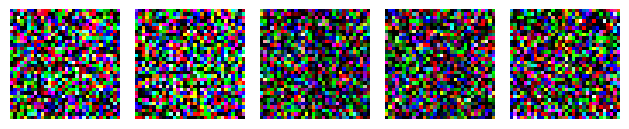

In [56]:
#lets see 5 images from Xwhite
for m in range(5):
          img=ZCA_whit[m].reshape(32,32,3)
          plt.subplot(1,5,m+1)
          plt.imshow(img)
          plt.axis('off')
plt.tight_layout() #Adjust subplot spacing for a cleaner layout
plt.show()
    

When using ZCA whitening (unlike PCA whitening), we usually keep all n
 dimensions of the data, and do not try to reduce its dimension

IN PRACTICE, we will not apply PCA whitening with Convolutional Networks

**PITFALL** we must split the dataset  into training ,test,cv. then calculate the mean from training set then subtract this value to each splitted dataset.

### Initializing weight
- we will not initialize all weights to zero. Because then all the neurons will calculate same outputs.Thus they will calculate the same gradient during backpropagation and undergo same weight update.
- Therefore we will randomly initialize value to avoid this problem and also to avoid zero. we will do so by this command W=np.random.randn(num_labels,num_features)

- **Calibrating the variances with 1/sqrt(n)**:One problem with the above suggestion is that the distribution of the outputs from a randomly initialized neuron has a variance that grows with the number of inputs. It turns out that we can normalize the variance of each neuron’s output to 1 by scaling its weight vector by the square root of its fan-in (i.e. its number of inputs). That is, the recommended heuristic is to initialize each neuron’s weight vector as: w = np.random.randn(n) / sqrt(n), where n is the number of its inputs. This ensures that all neurons in the network initially have approximately the same output distribution and empirically improves the rate of convergence.

### Batch Normalization:
A recently developed technique by Ioffe and Szegedy called [Batch Normalization](https://arxiv.org/abs/1502.03167) alleviates a lot of headaches with properly initializing neural networks by explicitly forcing the activations throughout a network to take on a unit gaussian distribution at the beginning of the training. The core observation is that this is possible because normalization is a simple differentiable operation. In the implementation, applying this technique usually amounts to insert the BatchNorm layer immediately after fully connected layers (or convolutional layers, as we’ll soon see), and before non-linearities

### Regularization
There are several ways of controlling the capacity of Neural Networks to prevent overfitting:

**L2 regularization**: 
- Most common
- for every weight w we add the term $1\over 2 \lambda w^2$
- More in the Linear section

**L1 regularization**: We add term $\lambda  \mid w \mid$

**Elastic regularization**: combination of L2 and L1. $\lambda_1 \mid w \mid + \lambda_2 w^2$

**Max Norm Constraints**
Unlike weight regularization this process enforce constraints to keep the weights below a certain threshhold. One of its appealing properties is that network cannot “explode” even when the learning rates are set too high because the updates are always bounded.

**Dropout**: Dropout is recently introduced regularization technique where the neural network is sampled wihtin the whole neural network. This is done by keeping some neurons inactive while training using probability.This means updating the parameters of the sampled network. In this process the final prediction is the average of the result of different sampled models.


In [1]:
""" Vanilla Dropout: Not recommended implementation (see notes below) """

p = 0.5 # probability of keeping a unit active. higher = less dropout

def train_step(X):
  """ X contains the data """
  
  # forward pass for example 3-layer neural network
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = np.random.rand(*H1.shape) < p # first dropout mask
  H1 *= U1 # drop!
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = np.random.rand(*H2.shape) < p # second dropout mask
  H2 *= U2 # drop!
  out = np.dot(W3, H2) + b3
  
  # backward pass: compute gradients... (not shown)
  # perform parameter update... (not shown)
  
def predict(X):
  # ensembled forward pass
  H1 = np.maximum(0, np.dot(W1, X) + b1) * p # NOTE: scale the activations
  H2 = np.maximum(0, np.dot(W2, H1) + b2) * p # NOTE: scale the activations
  out = np.dot(W3, H2) + b3

**Note**:
- we perform dropout while training but not in the time of testing.
- During testing we need to scale the on the outputs of the layers where we perform dropout. Because while testing we want the outputs of the neurons identical to the outputs of training time. Suppose we dropout a neuron with value x. With dropout the output of the neuron become $px+(1-p)0$. Because the output of this neuron is expected to set zero with probability $1-p$. During test time neurons are always active, we must adjust x->px to keep the same expected output.

Scaling the outputs during training time is undesiarable. To avoid this problem we can apply **inverted dropout** which perfoms the scaling during training time.

In [2]:
""" 
Inverted Dropout: Recommended implementation example.
We drop and scale at train time and don't do anything at test time.
"""

p = 0.5 # probability of keeping a unit active. higher = less dropout

def train_step(X):
  # forward pass for example 3-layer neural network
  H1 = np.maximum(0, np.dot(W1, X) + b1)
  U1 = (np.random.rand(*H1.shape) < p) / p # first dropout mask. Notice /p!
  H1 *= U1 # drop!
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  U2 = (np.random.rand(*H2.shape) < p) / p # second dropout mask. Notice /p!
  H2 *= U2 # drop!
  out = np.dot(W3, H2) + b3
  
  # backward pass: compute gradients... (not shown)
  # perform parameter update... (not shown)
  
def predict(X):
  # ensembled forward pass
  H1 = np.maximum(0, np.dot(W1, X) + b1) # no scaling necessary
  H2 = np.maximum(0, np.dot(W2, H1) + b2)
  out = np.dot(W3, H2) + b3

### Dropout reading
- [Dropout paper](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)
- [Dropout training as adaptive regularization](https://proceedings.neurips.cc/paper_files/paper/2013/file/38db3aed920cf82ab059bfccbd02be6a-Paper.pdf)